## Word Cloud: implementazione

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from PIL import Image
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = open("thelordofthering.txt", "r")
text=text.read()
text=text.translate(str.maketrans('', '', string.punctuation))
text=text.replace("\n", "")
text=text.replace("“", "")
text=text.replace("’", "")
text

'THE LORD OF THE RINGS Vart One THE FELLOWSHIP OF THE RING JRRToIkien Complete Table of Contents Foreword Prologue 1  Concerning Hobbits 2 Concerning Pipeweed 3 Of the Ordering of the Shire 4 Of the Finding of the Ring note on the shire records Book I Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter 11 Chapter 12 A Longexpected Party The Shadow of the Past Three is Company A Short Cut to Mushrooms A Conspiracy Unmasked The Old Forest In the House of Tom Bombadil Fog on the BarrowDowns At the Sign of The Prancing Pony Strider A Knife in the Dark Flight to the Ford Book II Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Many Meetings The Council of Elrond The Ring Goes South A Journey in the Dark The Bridge of Khazaddym Lothlurien The Mirror of Galadriel Farewell to Lurien The Great River The Breaking of the Fellowship Book III Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5

Conto il numero di occorrenze di ogni parola, escludo le stopwords, e considero le parole che occorrono almeno 100 volte nel testo

In [2]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [3]:
occorrenze=dict()

for parola in text.lower().split():
    if parola not in STOPWORDS:
        if parola in occorrenze:
            occorrenze[parola] += 1
        else:
            occorrenze[parola] = 1

In [4]:
freq=pd.DataFrame.from_dict(occorrenze, orient='index', columns=['Freq.'])
freq=freq.sort_values(by=['Freq.'], ascending=False)
freq=freq[freq['Freq.']>=100]
freq

,Freq.
said,1481
frodo,1037
now,678
will,562
gandalf,462
...,...
sound,103
keep,102
power,102
course,101


Creo un istogramma che mostri la frequenza delle prime 15 parole

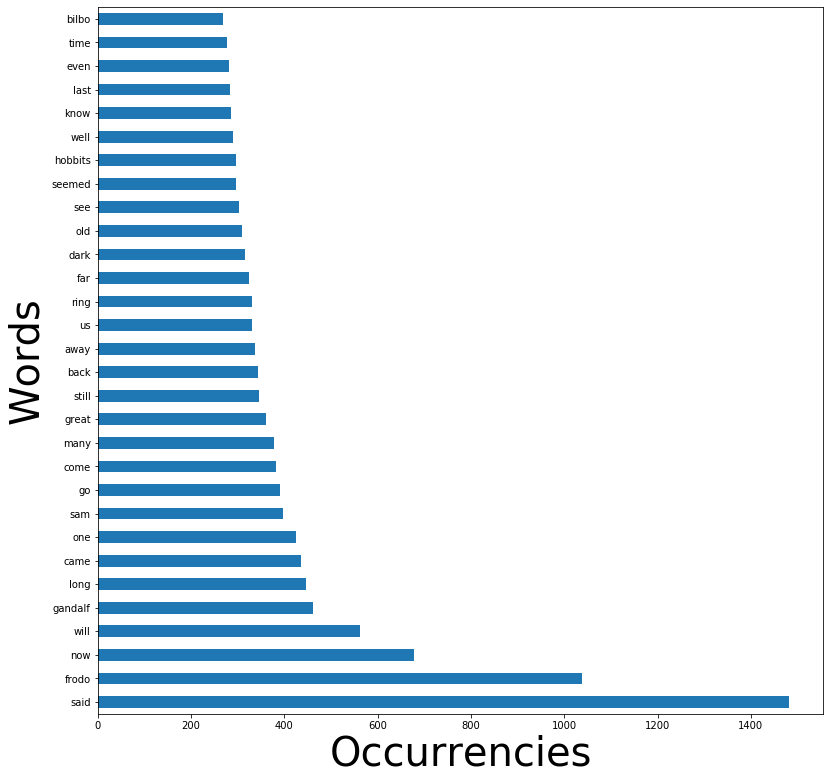

In [5]:
top=freq.head(30)
top.plot.barh(legend=False, align='center', figsize=(13,13))
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=17)
plt.xlabel("Occurrencies", size=40)
plt.ylabel("Words", size=40)
plt.show()

# Creo la prima word cloud

N.B. l'attributo collocations dell'oggetto wordcloud mi dirà se considerare o meno i bigrammi più frequenti

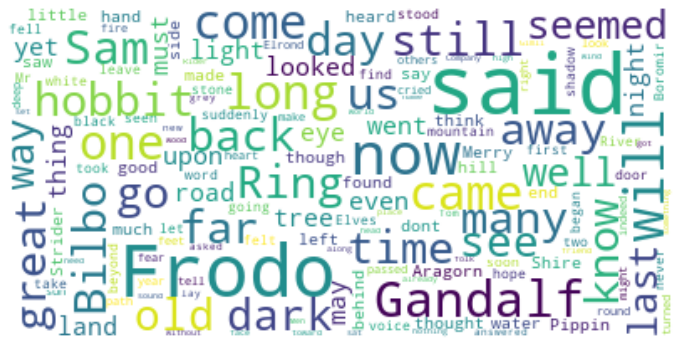

In [6]:
plt.figure(figsize=(12,15))
wc=WordCloud(max_font_size=50, max_words=150, background_color="white", collocations=False, stopwords=STOPWORDS).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Ora provo a dare una forma alla wordcloud

In [7]:
book_mask=np.array(Image.open("book.png"))
book_mask_new=np.ndarray((book_mask.shape[0],book_mask.shape[1]), np.int32)
book_mask

array([[[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       ...,

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247

In [8]:
book_mask_new
for i in range(len(book_mask)):
    for j in range(len(book_mask[1])):
        if(book_mask[i][j][1]!=0):
            book_mask_new[i][j]=255
        else:
            book_mask_new[i][j]=0

(-0.5, 859.5, 568.5, -0.5)

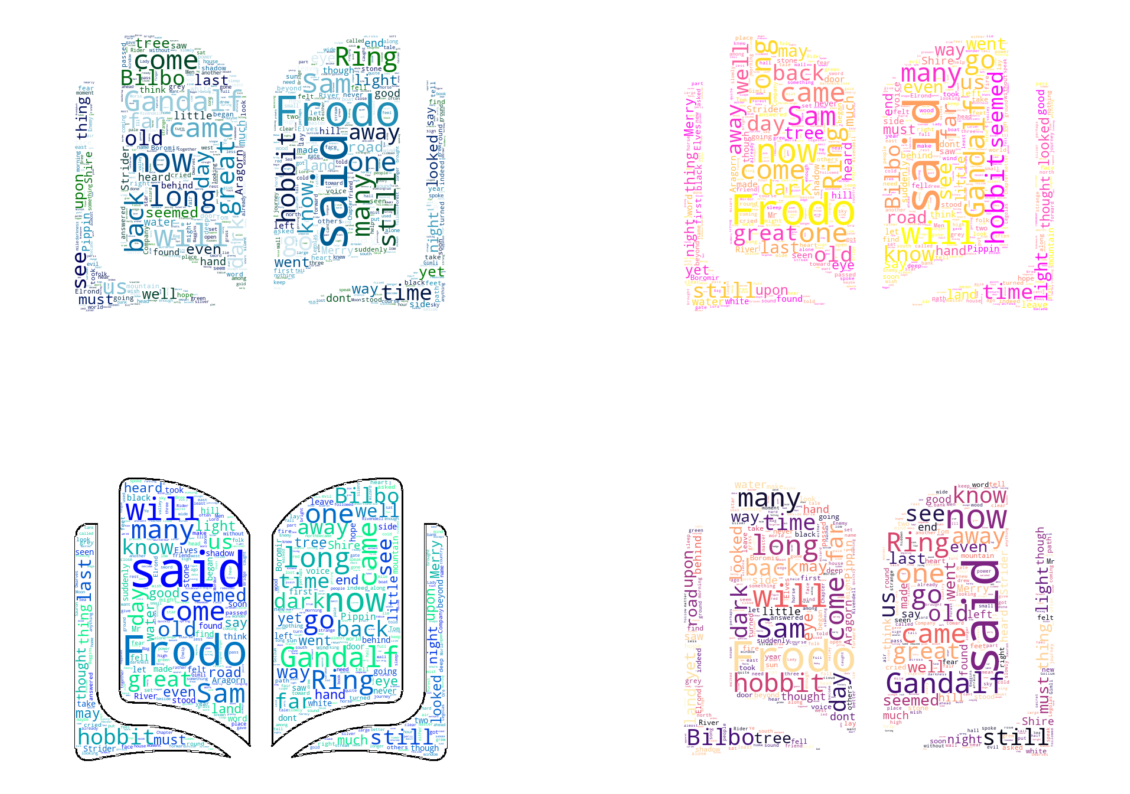

In [16]:
wc = WordCloud(background_color="white", max_words=1000, mask=book_mask_new,
               stopwords=STOPWORDS, contour_width=0, contour_color="Black", collocations=False, colormap='ocean')

wc2 = WordCloud(background_color="white", max_words=1000, mask=book_mask_new,
               stopwords=STOPWORDS, contour_width=0, contour_color="Black", collocations=False, colormap='spring')

wc3 = WordCloud(background_color="white", max_words=500, mask=book_mask_new,
               stopwords=STOPWORDS, contour_width=1, contour_color="Black", collocations=False, colormap='winter')

wc4 = WordCloud(background_color="white", max_words=500, mask=book_mask_new,
               stopwords=STOPWORDS, contour_width=0, contour_color="Black", collocations=False, colormap='magma')

# Generate a wordcloud
wc.generate(text)
wc2.generate(text)
wc3.generate(text)
wc4.generate(text)

# show
plt.figure(figsize=[20,15])
plt.subplot(2,2,1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(wc4, interpolation='bilinear')
plt.axis("off")


In [10]:
book_mask2=np.array(Image.open("book2.png"))
book_mask_new2=np.ndarray((book_mask2.shape[0],book_mask2.shape[1]), np.int32)

In [11]:
book_mask_new2
for i in range(len(book_mask2)):
    for j in range(len(book_mask2[1])):
        if(book_mask2[i][j][1]!=0):
            book_mask_new2[i][j]=255
        else:
            book_mask_new2[i][j]=0

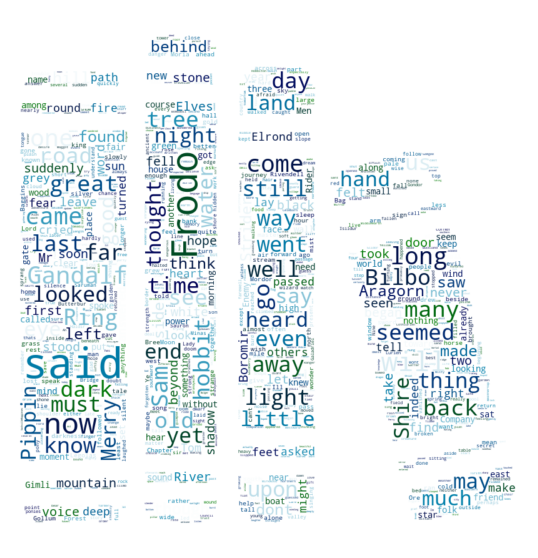

In [12]:
wc = WordCloud(background_color="white", max_words=1000, mask=book_mask_new2,
               stopwords=STOPWORDS, contour_width=0, contour_color="Blue",  collocations=False, colormap='ocean')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Ora uso il colore dell'immagine di partenza come colormap per la wordcloud 

In [13]:
colored_mask=Image.open("colored.png")
I = np.array(colored_mask)

In [14]:
colored_mask_new=np.ndarray((I.shape[0],I.shape[1]), np.int32)
for i in range(len(I)):
    for j in range(len(I[1])):
        if(I[i][j][1]!=0):
            colored_mask_new[i][j]=0
        else:
            colored_mask_new[i][j]=255

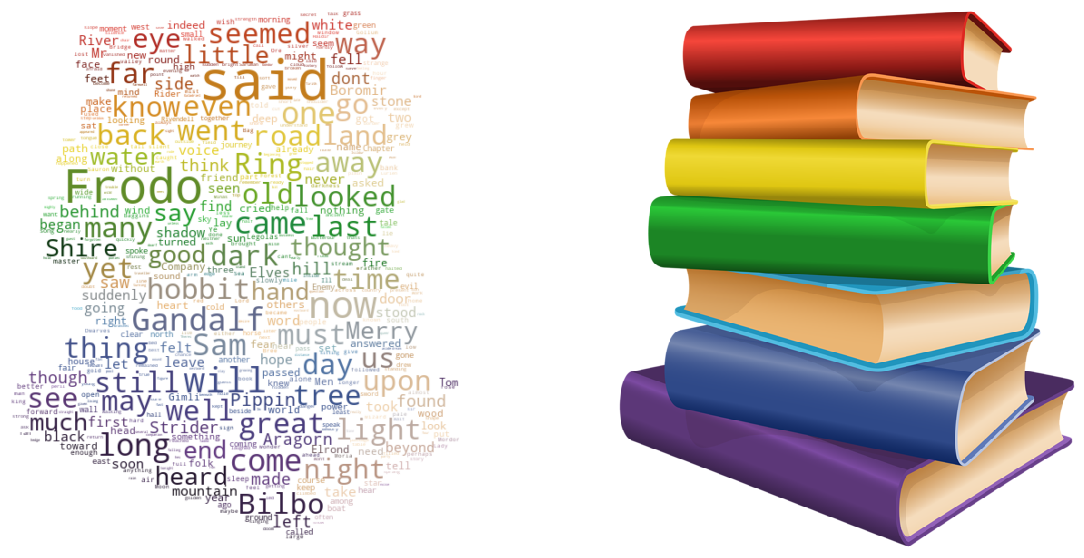

In [15]:
wc_color = WordCloud(stopwords=STOPWORDS, collocations=False, prefer_horizontal=1, max_font_size=60, background_color="white", mode="RGBA", max_words=500, mask=colored_mask_new).generate(text)
image_colors = ImageColorGenerator(np.array(colored_mask))

# create coloring from image
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.imshow(wc_color.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(I)